# Lead Score Assignment

In [1]:
# importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



# for modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

## 1. Data Understanding

In [2]:
#loading the data
leads_data = pd.read_csv('Leads.csv')

In [3]:
#checking the shape
leads_data.shape

(9240, 37)

- Data has 37 columns and 9240 rows

### Looking at the statistical summary of numerical variables

In [4]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leads_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [6]:
leads_data['Asymmetrique Profile Score'].isnull().sum()

4218

In [7]:
leads_data['Asymmetrique Activity Score'].isnull().sum()

4218

**Observation**
- There are many missing values in Asymmetrique Profile Score and Asymmetrique Activity Score column
- There are outliers in TotalVisits, Total Time Spent on Website and Page Views Per Visit

### Checking the data types

In [8]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

####  Categorical columns

In [9]:
cat_cols=leads_data.select_dtypes(object)
cat_cols.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Numerical Columns

In [10]:
num_cols=leads_data.select_dtypes(['int64','float64'])
print(num_cols.columns)
print(num_cols.shape)

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')
(9240, 7)


- we see there are a total of 9 numerical columns

#### Binary categorical Columns

In [11]:
bin_cat_cols=['I agree to pay the amount through cheque',
'A free copy of Mastering The Interview',
'Update me on Supply Chain Content',
'Receive More Updates About Our Courses',
'Through Recommendations',
'Digital Advertisement',
'Newspaper',
'Newspaper Article',
'X Education Forums',
'Magazine',
'Search',
'Do Not Email',
'Do Not Call',
'Get updates on DM Content']

In [12]:
for i in bin_cat_cols:
    print(leads_data[i].value_counts())
    print('\n')

No    9240
Name: I agree to pay the amount through cheque, dtype: int64


No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


No    9240
Name: Update me on Supply Chain Content, dtype: int64


No    9240
Name: Receive More Updates About Our Courses, dtype: int64


No     9233
Yes       7
Name: Through Recommendations, dtype: int64


No     9236
Yes       4
Name: Digital Advertisement, dtype: int64


No     9239
Yes       1
Name: Newspaper, dtype: int64


No     9238
Yes       2
Name: Newspaper Article, dtype: int64


No     9239
Yes       1
Name: X Education Forums, dtype: int64


No    9240
Name: Magazine, dtype: int64


No     9226
Yes      14
Name: Search, dtype: int64


No     8506
Yes     734
Name: Do Not Email, dtype: int64


No     9238
Yes       2
Name: Do Not Call, dtype: int64


No    9240
Name: Get updates on DM Content, dtype: int64




**Observation**
- There are 7 numerical columns and 30 categorical columns
- Also we have binary columns:( from data dictionary)
    - I agree to pay the amount through cheque
    - a free copy of Mastering The Interview
    - Update me on Supply Chain Content
    - Receive More Updates About Our Courses
    - Through Recommendations
    - Digital Advertisement
    - Newspaper
    - Newspaper Article
    - X Education Forums
    - Magazine
    - Search
    - Do Not Email
    - Do Not Call
    - Converted (target variable)
- We need to convert yes/no to 1/0 respectively in binary categorical columns
- Also we see the columns with single value i.e No. They are :
    - Receive More Updates About Our Courses(only no)
    - Update me on Supply Chain Content
    - I agree to pay the amount through cheque
    - Magazine
    - Get updates on DM Content
**We can drop these columns as these won't add information to our model. Ths will be done in data cleaning step**
    

### Checking null values

In [13]:
leads_data.isnull().sum()/len(leads_data) *100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

- There are columns with greater than 35% of null values. 
- We need to drop the columns with high percentage values.
    - The columns Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score, need to be deleted because they have more than 40% of its values as null.
    


### Let's Clean the data!

## 2. Data Cleaning


### Redundant Variables

**Redundant Columns:**
1. Columns not giving any useful insights: 
- Prospect ID                                  
- Lead Number

2. Columns with only single value (i.e No)
- Receive More Updates About Our Courses(only no)
- Update me on Supply Chain Content
- I agree to pay the amount through cheque
- Magazine
- Get updates on DM Content

In [14]:
leads_data.drop(['Prospect ID','Lead Number','Receive More Updates About Our Courses',
              'Update me on Supply Chain Content', 'I agree to pay the amount through cheque','Get updates on DM Content','Magazine'
              ],axis=1,inplace=True)

In [15]:
#updating binary columns
bin_cat_cols=[
'A free copy of Mastering The Interview',
'Through Recommendations',
'Digital Advertisement',
'Newspaper',
'Newspaper Article',
'X Education Forums',
'Search',
'Do Not Email',
'Do Not Call']

In [16]:
leads_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

### Handling Missing Values

In [17]:
# checking the new updated data frame for null values 
leads_data.isnull().sum()/len(leads_data)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

- Dropping columns having null values >40%

In [18]:
leads_data.drop(['Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score','Lead Quality'],axis=1,inplace=True)

In [19]:
# checking the new updated data frame for null values 
leads_data.isnull().sum()/len(leads_data)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

#### Columns having >25% null values
- Tags
- Lead Profile
- What is your current occupation                
- What matters most to you in choosing a course
- Country

In [20]:
leads_data['Tags'].value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [21]:
# maximum tags are 'Will revert after reading the email ' hence converting null to this will have no after effect.
leads_data['Tags'] = leads_data['Tags'].replace(np.nan,'Will revert after reading the email')

In [22]:
# new updated null value in the features
leads_data.isnull().sum()/len(leads_data)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [23]:
leads_data['Lead Profile'].value_counts(normalize=True)

Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: Lead Profile, dtype: float64

In [24]:
leads_data['Lead Profile'] = leads_data['Lead Profile'].replace('Select',np.nan)

In [25]:
leads_data['Lead Profile'].value_counts(normalize=True)

Potential Lead                 0.676310
Other Leads                    0.204193
Student of SomeSchool          0.101048
Lateral Student                0.010063
Dual Specialization Student    0.008386
Name: Lead Profile, dtype: float64

In [26]:
# maximum are Potential lead so it is better to convert the null values to Unknown as it it create biasedness in the feature

leads_data['Lead Profile'] = leads_data['Lead Profile'].replace(np.nan,'Unknown')

In [27]:
# revising the null list in the updated data frame
leads_data.isnull().sum()/len(leads_data)*100


Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [28]:
leads_data['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [29]:
# converting the nan values to other will be very much benificial
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(np.nan,'Other')

In [30]:
leads_data['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [31]:
# similarly for this feature also converting the nan values to Other
leads_data['What matters most to you in choosing a course'] = leads_data['What matters most to you in choosing a course'].replace(np.nan,'Other')

In [32]:
# revising the null list in the updated data frame
leads_data.isnull().sum()/len(leads_data)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [33]:
leads_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [34]:
leads_data['Country'] = leads_data['Country'].replace(np.nan,'India')

#### Columns having >15% null values
- How did you hear about X Education
- Specialization
- City

In [35]:
leads_data['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [36]:
# As the Select variable denotes a sense of undecided factor from the point view of the customer hence these can be changed to NaN
leads_data['How did you hear about X Education'] = leads_data['How did you hear about X Education'].replace('Select',np.nan)

In [37]:
leads_data['How did you hear about X Education'].value_counts(normalize=True)

Online Search            0.406030
Word Of Mouth            0.174874
Student of SomeSchool    0.155779
Other                    0.093467
Multiple Sources         0.076382
Advertisements           0.035176
Social Media             0.033668
Email                    0.013065
SMS                      0.011558
Name: How did you hear about X Education, dtype: float64

In [38]:
leads_data['How did you hear about X Education'] = leads_data['How did you hear about X Education'].replace(np.nan,'Other')

In [39]:
leads_data.isnull().sum()/len(leads_data)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                           0.000000
Specialization                                   15.562771
How did you hear about X Education                0.000000
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [40]:
leads_data['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [41]:
# Again for better simplification converting 'Select' to NaN
leads_data['Specialization'] = leads_data['Specialization'].replace('Select',np.nan)

In [42]:
leads_data['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [43]:
# As there is not much difference of value counts among top 3 hence it will be much more beniffiting if we convert the values of na to 'Others'
leads_data['Specialization'] = leads_data['Specialization'].replace(np.nan,'Unknown')

In [44]:
leads_data['City'].value_counts(normalize=True)

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: City, dtype: float64

In [45]:
leads_data['City'] = leads_data['City'].replace('Select',np.nan)

In [46]:
leads_data['City'] = leads_data['City'].replace(np.nan,'Mumbai')

In [47]:
# new updated null value in the features
leads_data.isnull().sum()/len(leads_data)*100

Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
How did you hear about X Education               0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

#### Columns having <10% null values
- TotalVisits  
- Page Views Per Visit
- Last Activity 
- Lead Source 

- Checking the rows with null values for the above mentioned columns

In [48]:
leads_data[leads_data['Last Activity'].isna()]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
77,Lead Add Form,Welingak Website,No,No,1,NaN,1096,NaN,NaN,India,...,No,No,No,No,No,Will revert after reading the email,Unknown,Mumbai,No,Modified
79,Lead Add Form,Reference,No,No,1,NaN,705,NaN,NaN,India,...,No,No,No,No,No,Will revert after reading the email,Potential Lead,Thane & Outskirts,No,Modified
81,Lead Add Form,Welingak Website,No,No,1,NaN,346,NaN,NaN,India,...,No,No,No,No,No,Will revert after reading the email,Unknown,Mumbai,No,Modified
88,Lead Add Form,Reference,No,No,1,NaN,1007,NaN,NaN,India,...,No,No,No,No,No,Closed by Horizzon,Lateral Student,Mumbai,No,Modified
120,Lead Add Form,Reference,No,No,1,NaN,1111,NaN,NaN,India,...,No,No,No,No,No,Closed by Horizzon,Potential Lead,Other Cities,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,Lead Add Form,Reference,No,No,0,NaN,1201,NaN,NaN,India,...,No,No,No,No,No,Interested in full time MBA,Unknown,Mumbai,No,Modified
8107,Lead Add Form,Reference,No,No,1,NaN,903,NaN,NaN,India,...,No,No,No,No,No,Lost to EINS,Potential Lead,Mumbai,No,Modified
8434,Lead Add Form,Reference,No,No,1,NaN,1458,NaN,NaN,India,...,No,No,No,No,No,Closed by Horizzon,Unknown,Mumbai,No,Modified
9015,Lead Add Form,Reference,No,No,1,NaN,1159,NaN,NaN,India,...,No,No,No,No,No,Closed by Horizzon,Potential Lead,Mumbai,No,Modified


In [49]:
leads_data['Last Activity'].fillna(leads_data['Last Activity'].mode()[0],inplace=True)

In [50]:
leads_data[leads_data['Last Activity'].isna()]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity


In [51]:
leads_data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

- will impute the column TotalVisits with median as it contains outliers

In [52]:
leads_data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

- will impute the column Page Views Per Visit with median as it contains outliers

In [53]:
leads_data['TotalVisits'].fillna(leads_data['TotalVisits'].median(),inplace=True)
leads_data['Page Views Per Visit'].fillna(leads_data['Page Views Per Visit'].median(),inplace=True)

In [54]:
leads_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

- Here, Google and google are having semantic issues. Let's replace google with Google
- After replacing, we will replace the null values with mode of Lead Source column i.e. Google

In [55]:
#replacing
leads_data['Lead Source'].replace({'google':'Google'},inplace=True)

In [56]:
leads_data['Lead Source'].fillna(leads_data['Lead Source'].mode()[0],inplace=True)

In [57]:
# new updated null value in the features
leads_data.isnull().sum()/len(leads_data)*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [58]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

- Columns: 25
- Rows: 9240 

## 3. Data Visualization

### Target Variable

In [59]:
# focussing on the target variable converted
leads_data['Converted'].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

- This shows that both the classes of data have sizeable representation

#### Visualizing  the numerical variables

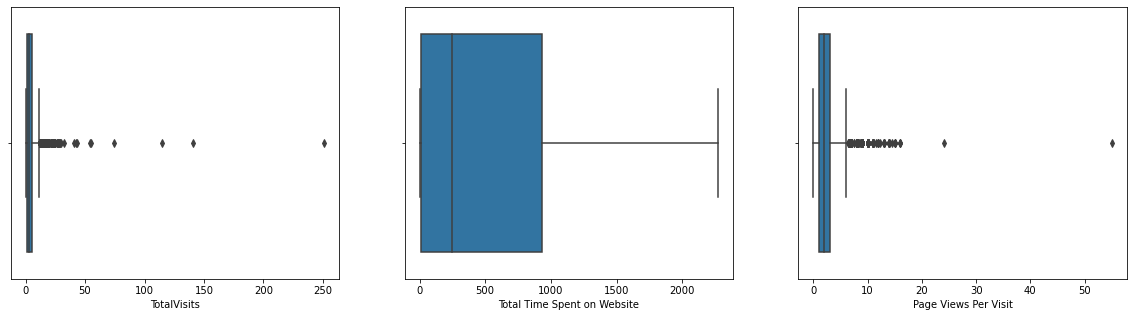

In [60]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.boxplot(leads_data.TotalVisits)
plt.subplot(1,3,2)
sns.boxplot(leads_data['Total Time Spent on Website'])
plt.subplot(1,3,3)
sns.boxplot(leads_data['Page Views Per Visit'])
plt.show()

- We have outliers in total Visits and Page views per visit
- Imputation won't be useful as the outliers explain variance in data in this case. Hence, we can do binning.

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

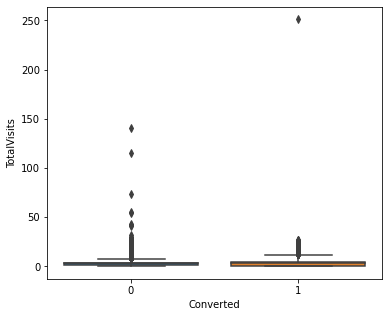

In [61]:
plt.figure(figsize=(6,5))
sns.boxplot(y='TotalVisits',x='Converted',data=leads_data)

- there are lot of outliers present in Total visits present we will just take into account only the values within 95th percentile

- Total Time Spent on Website'

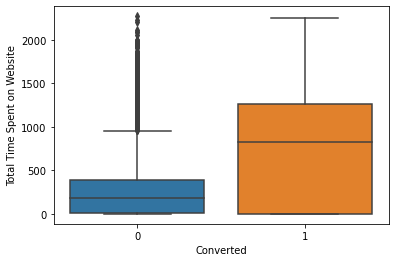

In [62]:
sns.boxplot(y='Total Time Spent on Website', x='Converted',data=leads_data)
plt.show()

**Observation**
- we see that there is no discrenable gap between total vists and converted 
- we also see that customers who spend more time on website are more likely to be converted.
- we also see that the median number of visits by converted customers as well as non-converted customers are same.

### Binning the columns - Page Views Per Visit, TotalVisits

- TotalVisits:
    - values go upto 250
    - let's bin upto 252

In [63]:
leads_data.TotalVisits.value_counts()

0.0      2189
2.0      1680
3.0      1443
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [64]:
total_visits_label=['0_Visits','1-2_Visits','3-4_Visits','5-6_Visits','7-8_Visits','9-10_Visits','11-12_Visits','above-12_Visits']
leads_data['TotalVisits'] = pd.cut(leads_data['TotalVisits'], bins=[-1,0.0,2,4,6,8,10,12,252], 
                                   labels = total_visits_label)

In [65]:
leads_data.TotalVisits.value_counts()

3-4_Visits         2563
0_Visits           2189
1-2_Visits         2075
5-6_Visits         1249
7-8_Visits          533
9-10_Visits         278
above-12_Visits     222
11-12_Visits        131
Name: TotalVisits, dtype: int64

- Page views per visit:
    - values go upto 55
    - let's bin upto 100

In [66]:
leads_data['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [67]:
leads_data['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1932
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [68]:
page_visits_label=['0_Page_views_per_visit','1-2_Page_views_per_visit','3-4_Page_views_per_visit','5-6_Page_views_per_visit','7-8_Page_views_per_visit','9-12_Page_views_per_visit','above-12_Page_views_per_visit']
leads_data['Page Views Per Visit'] = pd.cut(leads_data['Page Views Per Visit'], bins=[-1,0.0,2,4,6,8,12,100], 
                                   labels = page_visits_label)

In [69]:
leads_data['Page Views Per Visit'].value_counts()

1-2_Page_views_per_visit         3144
3-4_Page_views_per_visit         2696
0_Page_views_per_visit           2189
5-6_Page_views_per_visit          851
7-8_Page_views_per_visit          237
9-12_Page_views_per_visit          97
above-12_Page_views_per_visit      26
Name: Page Views Per Visit, dtype: int64

**Outliers are Handled!**

### Visualising Categorical Variables

In [70]:
cat_cols=leads_data.select_dtypes(object).columns

NameError: name 'xticks' is not defined

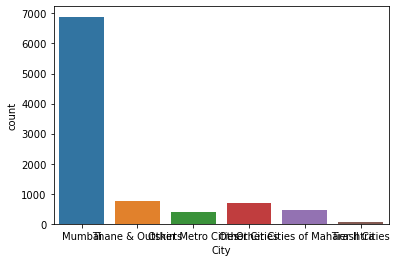

In [71]:
sns.countplot(leads_data.City)
xticks(rotation = 90)

In [ ]:
plt.figure(figsize=(5,5))
for i in range(len(cat_cols)):
    sns.countplot(y = cat_cols[i],data = leads_data,hue='Converted')
    plt.title(f'\n\n {cat_cols[i]}')
    plt.xticks(rotation='vertical')
    plt.show()


In [ ]:
#checking country column's values distribution
leads_data.Country.value_counts()

In [ ]:
#checking Last Notable Activity column's values distribution
leads_data['Last Notable Activity'].value_counts()

In [ ]:
#checking Last Activity column's values distribution
leads_data['Last Activity'].value_counts()

- replace the Had a Phone Conversation, Approached upfront, View in browser link Clicked, Email Received, Email Marked Spam ,Visited Booth in Tradeshow, Resubscribed to emails  with Others

In [ ]:
replace_cols=['Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked', 'Email Received', 'Email Marked Spam' ,'Visited Booth in Tradeshow', 'Resubscribed to emails']
#adding new category others
leads_data['Last Activity'].replace(replace_cols,'Other Activity',inplace=True)

In [ ]:
leads_data['Last Activity'].value_counts()

In [ ]:
#checking Tags column's values distribution
leads_data['Tags'].value_counts()

In [ ]:
## replacing the low count values of tags with other tags category
leads_data['Tags'] = leads_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                 'number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','wrong number given'], 'Other_Tags')

In [ ]:
sns.countplot(y =leads_data['Tags'] ,data = leads_data)
plt.show()

In [ ]:
#checking Lead Source column's values distribution
leads_data['Lead Source'].value_counts()


- Also, let's add Click2call, Press_Release, Social Media, Live Chat, youtubechannel, testone, Pay per Click Ads,   welearnblog_Home, WeLearn, blog and NC_EDM to **Others** Category for Lead Source Column

In [ ]:

#adding new category others
leads_data['Lead Source'].replace(['Click2call', 'Press_Release', 'Social Media', 'Live Chat', 'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home', 'WeLearn', 'blog','NC_EDM','bing'],'Others',inplace=True)

In [ ]:
sns.countplot(y =leads_data['Lead Source'] ,data = leads_data)
plt.show()

In [ ]:
leads_data['Lead Profile'].value_counts()

**Observation**
-  Maximum lead conversion happened:
    - Lead Origin as Landing Page Submission
    - leads prefer calls, digital advertisement and emails
    - Leads come through recommendations and by searching courses online
    - leads who were unemployed and working proffessional
    - leads who are visiting the site for better career prospects 
    - from city Mumbai
- The company must not put some resources in the Lead Add form as it has least Converted counts.
- Top sites from which positive leads are generated are
    - Olark Chat
    - Organic Search
    - Direct traffic
    - Google
    - The conversion rate from reference,Welingak Website are the highest
- There is no discrenable inferences can be made between specialization chosen and conversion rate

**Other insights:**
- **Country** columns doesn't give that much of information as most of the data belongs to India.
- **What matters most to you in choosing a course** column is biased towards Better Career Prospects.
- **Last notable Activity** and **Last Activity** seems same, so **Last notable Activity** can be dropped.

In [ ]:
#dropping the above mentioned columns
leads_data.drop(['Country','What matters most to you in choosing a course','Last Notable Activity'],axis=1,inplace=True)

In [ ]:
leads_data.shape

In [ ]:
leads_data.columns

- After cleaning we are left with 22 columns

## 4. Data Preparation

### Handling Binary Categorical Columns

In [ ]:
bin_cat_cols

#### Let's convert all the binary columns into numerical columns

In [ ]:
# converting the Yes to 1 and No to 0 
for feature in bin_cat_cols:
    leads_data[feature] = leads_data[feature].apply(lambda x : 1 if x=='Yes' else 0 )

In [ ]:
for i in bin_cat_cols:
    print(leads_data[i].value_counts())
    print('\n')

Looks Good!

### Checking the correlation coefficients

In [ ]:
corr=leads_data.corr()

In [ ]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

In [ ]:
plt.figure(figsize = (18, 5))
sns.heatmap(leads_data.corr(), mask=mask,annot = True, cmap="YlGnBu")
plt.show()

**Observation**
- Newspaper article is highly correlated with X educational forums. So, we can drop "Newspaper Article" as we have another column as "newspaper"
- X educational Forums is positively correlated with Digital Advertisement and Through Recommendations
- Converted is positively correlated with total time spent on website

In [ ]:
# dropping the column
leads_data.drop('Newspaper Article',axis=1,inplace=True)

In [ ]:
#checking the remaining features
leads_data.info()

### Dummy Variable Creation

In [ ]:
cat_cols=list(leads_data.select_dtypes(['object','category']).columns)
leads_data[cat_cols].head()

In [ ]:
for i in cat_cols:
    print(leads_data[i].value_counts())
    print('\n')

In [ ]:
cat_cols

#### Let's use the below features
- Lead Origin'
- Lead Source'
- 'TotalVisits'
- 'Page Views Per Visit'
- 'Specialization'
- 'How did you hear about X Education
<!-- - 'What is your current occupation
- Tags -->
- Last Activity
- Lead Profile
- city

In [ ]:
cat_cols.remove('Tags')
cat_cols.remove('Last Activity')

In [ ]:
# dropping Last Activity and Tags as they seem to be coming from sales team after contacting the lead

In [ ]:
leads_data.drop(['Last Activity','Tags'],axis=1,inplace=True)

In [ ]:
ls = pd.get_dummies(leads_data['Lead Source'], prefix='Lead Source')
# Dropping Lead Source_Others column
ls = ls.drop(['Lead Source_Others'], axis=1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,ls], axis=1)

In [ ]:
sp = pd.get_dummies(leads_data['Specialization'], prefix='Specialization')
# Dropping Specialization_Unknown column
sp = sp.drop(['Specialization_Unknown'], axis=1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,sp], axis=1)

In [ ]:
hh = pd.get_dummies(leads_data['How did you hear about X Education'], prefix='How did you hear about X Education')
# Dropping How did you hear about X Education_Other column
hh = hh.drop(['How did you hear about X Education_Other'], axis=1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,hh], axis=1)

In [ ]:
occ = pd.get_dummies(leads_data['What is your current occupation'], prefix='What is your current occupation')
# Dropping What is your current occupation_Other column
occ = occ.drop(['What is your current occupation_Other'], axis=1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,occ], axis=1)

In [ ]:
lp = pd.get_dummies(leads_data['Lead Profile'], prefix='Lead Profile')
# Dropping Lead Profile_Other Leads column
lp = lp.drop(['Lead Profile_Other Leads'], axis=1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,lp], axis=1)

In [ ]:
city = pd.get_dummies(leads_data['City'], prefix='City')
# Dropping City_Other Cities column
city = city.drop(['City_Other Cities'], axis=1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,city], axis=1)

In [ ]:
dummies=pd.get_dummies(leads_data[['Lead Origin', 'TotalVisits',
 'Page Views Per Visit']], drop_first=True)
leads_data = pd.concat([leads_data, dummies], axis=1)

In [ ]:
leads_data.info(verbose=True)

- let's drop the original categorical columns

In [ ]:
cat_cols

In [ ]:
leads_data.drop(cat_cols,axis=1,inplace=True)

In [ ]:
leads_data.info(verbose=True)

### Correlation check for training

In [ ]:
corr=leads_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

In [ ]:
plt.figure(figsize = (40,30))
sns.heatmap(corr,mask=mask,annot = True)
plt.show()

- It's not that clear here. We will look into the correlation in feature selection step

## 5. Test-Train Split

In [ ]:
# Putting feature variable to X
Y = leads_data.pop('Converted')
X=leads_data
X.head()

In [ ]:
Y.head()

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

## 6. Standardization

In [ ]:
leads_data.select_dtypes(['int64','float64'])

#### We only need to standardize column **Total Time Spent on Website**

In [ ]:
scaler = StandardScaler()
#scaling the columns
X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])
X_train.head()

#### Now let's get started with our model

## 7. Model Building

- First training model

In [ ]:
leads_data.columns

In [ ]:
# Logistic regression model
logm_1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm_1.fit().summary()

In [ ]:
X_train.info()

### 8: Feature Selection Using RFE

In [ ]:
logReg = LogisticRegression()

In [ ]:
rfe = RFE(logReg, 30)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

### Selected Columns

In [ ]:
selected_cols = X_train.columns[rfe.support_]
selected_cols

### Unselected Columns

In [ ]:
X_train.columns[~rfe.support_]

In [ ]:
#using columns supported by rfe

X_train_sm = sm.add_constant(X_train[selected_cols])
logm_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_2.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- Features with very High p value:
    - Newspaper
    - Digital Advertisement
    - Lead Profile_Dual Specialization Student
    - What is your current occupation_Housewife
    - Lead Source_Facebook

**Following the below approach:**
- High p-value,high Vif - **drop the variables**
- High Low
    - High p-value, low Vif :remove these first
    - Low p-value, high Vif: remove after the ones above
- Low p, low VIF - **keep the variables**

- Dropping **Newspaper**

In [ ]:
selected_cols=selected_cols.drop('Newspaper')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_3.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- P-value of Digital Advertisement is still very high,let's drop it.
- Also there is no change in the pattern of Vif values

- Dropping **Digital Advertisement**

In [ ]:
selected_cols=selected_cols.drop('Digital Advertisement')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_4.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- P-values of Lead Profile_Dual Specialization Student and What is your current occupation_Housewife is still very high
- lets's drop Lead Profile_Dual Specialization

- Dropping **Lead Profile_Dual Specialization Student**

In [ ]:
selected_cols=selected_cols.drop('Lead Profile_Dual Specialization Student')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_5.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- P-value of What is your current occupation_Housewife is still high. So, Let's drop it

- Dropping **What is your current occupation_Housewife**

In [ ]:
selected_cols=selected_cols.drop('What is your current occupation_Housewife')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_5.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- Still, there are features with high p-value
    - Lead Source_Facebook
    - Lead Origin_Lead Import	
    - Specialization_E-COMMERCE	
    - Specialization_Rural and Agribusiness	
    - Lead Source_Referral Sites
    - How did you hear about X Education_Emai
    - Page Views Per Visit_above-12_Page_views_per_visit

- let's drop Lead Source_Facebook with high p value and high VIF as well

- Dropping **Lead Source_Facebook**

In [ ]:
selected_cols=selected_cols.drop('Lead Source_Facebook')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_5.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- P-value of Specialization_E-COMMERCE is still high. So, Let's drop it.
- Also , VIF values have dropped

- Dropping **Specialization_E-COMMERCE**

In [ ]:
selected_cols=selected_cols.drop('Specialization_E-COMMERCE')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_5.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- P-value of Specialization_Rural and Agribusiness is still high. So, Let's drop it

- Dropping **Specialization_Rural and Agribusiness**

In [ ]:
selected_cols=selected_cols.drop('Specialization_Rural and Agribusiness')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_5.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- P-value of Lead Source_Referral Sites is still high. So, Let's drop it

- Dropping **Lead Source_Referral Sites**

In [ ]:
selected_cols=selected_cols.drop('Lead Source_Referral Sites')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_5.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- P-value of How did you hear about X Education_Email is high. So, Let's drop it

- Dropping **How did you hear about X Education_Email**

In [ ]:
selected_cols=selected_cols.drop('How did you hear about X Education_Email')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_5.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- P-value of Page Views Per Visit_above-12_Page_views_per_visit	is high. So, Let's drop it

- Dropping **Page Views Per Visit_above-12_Page_views_per_visit**

In [ ]:
selected_cols=selected_cols.drop('Page Views Per Visit_above-12_Page_views_per_visit')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_5.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- P-value of Specialization_IT Projects Management is still high. So, Let's drop it

- Dropping **Specialization_IT Projects Management**

In [ ]:
selected_cols=selected_cols.drop('Specialization_IT Projects Management')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_5.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- P-value of Lead Origin_Lead Import is still high. So, Let's drop it

- Dropping **Lead Origin_Lead Import**

In [ ]:
selected_cols=selected_cols.drop('Lead Origin_Lead Import')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_5.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- P-value of all features seem significant. 
- but, VIF value of Page Views Per Visit_1-2_Page_views_per_visit is high. Let's drop this feature.

- Dropping **Page Views Per Visit_1-2_Page_views_per_visit**

In [ ]:
selected_cols=selected_cols.drop('Page Views Per Visit_1-2_Page_views_per_visit')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_5.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- P-values and VIF values are significant now

In [ ]:
len(selected_cols)

- we have 17 features, but we have to minimize the features to increase the efficieny

### Correlation check
- Let's look at correlation matrix once again

In [ ]:
corr=X_train[selected_cols].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(corr,mask=mask,annot = True)
plt.show()

- There is significant correlation b/w TotalVisits_3-4_Visits and Page Views Per Visit_3-4_Page_views_per_visit
- There is significant Correlation b/w TotalVisits_1-2_Visits and Page Views Per Visit_3-4_Page_views_per_visit
- There is significant Correlation b/w 'What is your current occupation_Unemployed' and 'What is your current occupation_Working Professional'

- Dropping **Page Views Per Visit_3-4_Page_views_per_visit**

In [ ]:
selected_cols=selected_cols.drop('Page Views Per Visit_3-4_Page_views_per_visit')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_5.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- P-value and Vif did't change much.
- p value of Lead Profile_Lateral Student is 0.034. It is significant, but it seems unimportant

- Dropping **Lead Profile_Lateral Student**

In [ ]:
selected_cols=selected_cols.drop('Lead Profile_Lateral Student')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_5.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- Nothing much happened.

- Dropping **What is your current occupation_Unemployed**

In [ ]:
selected_cols=selected_cols.drop('What is your current occupation_Unemployed')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_5.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- After dropping What is your current occupation_Unemployed, P-value increased for Page Views Per Visit_9-12_Page_views_per_visit.

- Dropping **Page Views Per Visit_9-12_Page_views_per_visit**

In [ ]:
selected_cols=selected_cols.drop('Page Views Per Visit_9-12_Page_views_per_visit')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_5.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- After dropping What is your current occupation_Unemployed, P-value increased for Page Views Per Visit_7-8_Page_views_per_visit.

- Dropping **Page Views Per Visit_7-8_Page_views_per_visit**

In [ ]:
selected_cols=selected_cols.drop('Page Views Per Visit_7-8_Page_views_per_visit')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_5.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- P-values of features stay significant
- Looking at the VIF values now, all the values seem to be good

- Dropping **What is your current occupation_Student** as we already have one feature for occupation in model

In [ ]:
selected_cols=selected_cols.drop('What is your current occupation_Student')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_5.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- P-values of features stay significant
- Looking at the VIF values now, all the values seem to be good

### Correlation check
- Let's look at correlation matrix once again

In [ ]:
corr=X_train[selected_cols].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(corr,mask=mask,annot = True)
plt.show()

- Lead Origin_Lead Add Form and Lead Source_Welingak Website seems to have some correlation. Let's check by dropping Lead Source_Welingak Website

In [ ]:
selected_cols=selected_cols.drop('Lead Source_Welingak Website')
selected_cols

#### Building the model again

In [ ]:
X_train_sm = sm.add_constant(X_train[selected_cols])
logm_6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_6.fit()
res.summary()

#### Checking VIFs

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[selected_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_cols].values, i) for i in range(X_train[selected_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- model seems to have good number of features with significant p values and good VIF values.
- let's use the selected features to predict

## Model Prediction

In [ ]:
#getting predicted values
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1) #reshaping to get an array
y_train_pred[:10]

In [ ]:
#Creating dataframe 
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_Id'] = y_train.index
y_train_pred_final.head()

## Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the resulting probabilities
y_train_pred_final.head()

#### Checking Confusion matrix 

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

#### Checking overall score

In [ ]:
Accuracy_train=round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)*100,2)                                           
print(Accuracy_train)

### Looking at Other Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Calculating Precision and  Recall score
Precision_train = round((TP/(FP+TP)*100),2)
Recall_train = round((TP/(FN+TP)*100),2)

In [ ]:
Sensitivity_train =round((TP / float(TP+FN))*100,2)
Specificity_train =round((TN / float(TN+FP))*100,2)

In [ ]:
# Let's see the sensitivity of our logistic regression model
print(f'Sensitivity is: {Sensitivity_train}%')
print(f'Specificity is: {Specificity_train}%')
print(f'Precision: {Precision_train}%')
print(f'Recall: {Recall_train}%')
print(f'Accuracy: {Accuracy_train}%')

#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

- ROC curve seems pretty good and we are good to go.

### Precision and recall tradeoff

- Let's look at the precision and recall trade-off once

In [ ]:
from sklearn.metrics import precision_recall_curve


In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- We can see that recall is bit higher when precision is high 
- Also, recall is high when precision is low
- It looks good in case of given business problem

## Making predictions on the test set

In [ ]:
X_test[['Total Time Spent on Website']] = scaler.transform(X_test[['Total Time Spent on Website']])

In [ ]:
selected_cols

In [ ]:
X_test = X_test[selected_cols]
X_test.head()

In [ ]:
#adding constant and predicting 
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
y_test_df['Lead_ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

In [ ]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [ ]:
y_pred_final.index=y_pred_final['Lead_ID']
y_pred_final.head()

In [ ]:
y_pred_final.drop('Lead_ID',inplace=True,axis=1)
y_pred_final.head()

Threshold using from precision recall tradeoff

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final

## Assigning a Lead Score to the Predicted values

In [ ]:
y_pred_final['Lead Score']=y_pred_final['Converted_Prob'].apply(lambda x:round(x*100))

In [ ]:
y_pred_final

#### Checking Confusion matrix 

In [ ]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

#### Checking overall score

In [ ]:
Accuracy_test=round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)*100,2)
print(Accuracy_test)

## Model Evaluation

In [ ]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [ ]:
# Calculating Precision and Recall score
Precision_test = round((TP/(FP+TP)*100),2)
Recall_test = round((TP/(FN+TP)*100),2)

In [ ]:
Sensitivity_test =round((TP / float(TP+FN))*100,2)
Specificity_test =round((TN / float(TN+FP))*100,2)

In [ ]:
# Let's see the sensitivity of our logistic regression model
print(f'Sensitivity is: {Sensitivity_test}%')
print(f'Specificity is: {Specificity_test}%')
print(f'Precision: {Precision_test}%')
print(f'Recall: {Recall_test}%')
print(f'Accuracy: {Accuracy_test}%')

### Comparing with train dataset metrics

In [ ]:
print(f'Train Sensitivity is: {Sensitivity_train}%')
print(f'Train Specificity is: {Specificity_train}%')
print(f'Train Precision: {Precision_train}%')
print(f'Train Recall: {Recall_train}%')
print(f'Train Accuracy: {Accuracy_train}%')

## Conclusion

- By looking at the Sensitivity, Specificity, Accuracy, Precision and Recall score, Our model results on test dataset are essentially accurate and that the model is stable
- We got higher recall score than precision score.
- This model has the flexibility to change to meet the needs of the business in the future.

### Model's final features

In [ ]:
res.params

**Follwing features contribute (positively/ negatively) towards the probability of a lead getting converted:**


- Do Not Email **(effects negatively)**                               
- Total Time Spent on Website  **(effects positively)**                            
- Specialization_Hospitality Management **(effects negatively)**               
- What is your current occupation_Working Professional **(effects positively)**      
- Lead Profile_Potential Lead  **(effects positively)**                              
- Lead Profile_Student of SomeSchool  **(effects negatively)**                       
- Lead Origin_Lead Add Form  **(effects positively)**                                 
- TotalVisits_1-2_Visits  **(effects negatively)**                                 
- TotalVisits_3-4_Visits  **(effects negatively)**                                 
- Page Views Per Visit_5-6_Page_views_per_visit  **(effects negatively)**   

In [ ]:
res.summary()

### Important features

Important features responsible for good conversion rate are :
- Lead Origin_Lead Add Form: if the lead has lead origin as Lead Add Form, he is more likely to convert.
- What is your current occupation_Working Professional: if the lead is Working Professional, he is more likely to convert.
- Lead Profile_Student of SomeSchool: if the lead profile is student of someSchool, he is least likely to convert.
- Lead Profile_Potential Lead: if the lead profile is Potential Lead, he is more likely to convert.